In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.insert(0, '/home/munchmej/code/DeepDenoiser/deepdenoiser/')

In [3]:
import tensorflow as tf
import numpy as np
import torch
import matplotlib.pyplot as plt

from model import UNet

In [4]:
tf_model = UNet(mode="pred")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.


Instructions for updating:
Use `tf.keras.layers.Conv2D` instead.


Instructions for updating:
Please use `layer.__call__` method instead.


Instructions for updating:
Please use `layer.__call__` method instead.


Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).


Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).


Instructions for updating:
Use keras.layers.dropout instead.


Instructions for updating:
Use keras.layers.dropout instead.


Instructions for updating:
Use `tf.keras.layers.Conv2DTranspose` instead.


Instructions for updating:
Use `tf.keras.layers.Conv2DTranspose` instead.


In [5]:
sess_config = tf.compat.v1.ConfigProto()
sess_config.gpu_options.allow_growth = True

In [6]:
with tf.compat.v1.Session(config=sess_config) as sess:
    saver = tf.compat.v1.train.Saver(tf.compat.v1.global_variables())
    init = tf.compat.v1.global_variables_initializer()
    sess.run(init)
    
    # latest_check_point = tf.train.latest_checkpoint("../../../DeepDenoiser/model/190614-104802/")
    latest_check_point = tf.train.latest_checkpoint("../../../DeepDenoiser/model/urban/210906-023102/")
    saver.restore(sess, latest_check_point)

INFO:tensorflow:Restoring parameters from ../../../DeepDenoiser/model/urban/210906-023102/model_70_loss_1.84e-01.ckpt


INFO:tensorflow:Restoring parameters from ../../../DeepDenoiser/model/urban/210906-023102/model_70_loss_1.84e-01.ckpt


In [7]:
sess = tf.compat.v1.Session(config=sess_config)
saver = tf.compat.v1.train.Saver(tf.compat.v1.global_variables())
init = tf.compat.v1.global_variables_initializer()
sess.run(init)

# latest_check_point = tf.train.latest_checkpoint("../../../DeepDenoiser/model/190614-104802/")
latest_check_point = tf.train.latest_checkpoint("../../../DeepDenoiser/model/urban/210906-023102/")
saver.restore(sess, latest_check_point)

INFO:tensorflow:Restoring parameters from ../../../DeepDenoiser/model/urban/210906-023102/model_70_loss_1.84e-01.ckpt


INFO:tensorflow:Restoring parameters from ../../../DeepDenoiser/model/urban/210906-023102/model_70_loss_1.84e-01.ckpt


In [8]:

nbt, nch, nst, nf, nt, nimg = 2, 3, 1, 31, 201, 2

X_batch_ = np.random.random([nbt * nch * nst, nf, nt, nimg])

preds = sess.run(tf_model.preds, feed_dict={tf_model.X: X_batch_, tf_model.drop_rate: 0, tf_model.is_training: False})

In [9]:
preds.shape

(6, 31, 201, 2)

In [10]:
tf.compat.v1.global_variables()

[<tf.Variable 'global_step:0' shape=() dtype=int32>,
 <tf.Variable 'Input/input_conv/kernel:0' shape=(3, 3, 2, 8) dtype=float32>,
 <tf.Variable 'Input/input_bn/gamma:0' shape=(8,) dtype=float32>,
 <tf.Variable 'Input/input_bn/beta:0' shape=(8,) dtype=float32>,
 <tf.Variable 'Input/input_bn/moving_mean:0' shape=(8,) dtype=float32>,
 <tf.Variable 'Input/input_bn/moving_variance:0' shape=(8,) dtype=float32>,
 <tf.Variable 'DownConv_0/down_conv1_1/kernel:0' shape=(3, 3, 8, 8) dtype=float32>,
 <tf.Variable 'DownConv_0/down_bn1_1/gamma:0' shape=(8,) dtype=float32>,
 <tf.Variable 'DownConv_0/down_bn1_1/beta:0' shape=(8,) dtype=float32>,
 <tf.Variable 'DownConv_0/down_bn1_1/moving_mean:0' shape=(8,) dtype=float32>,
 <tf.Variable 'DownConv_0/down_bn1_1/moving_variance:0' shape=(8,) dtype=float32>,
 <tf.Variable 'DownConv_0/down_conv3_1/kernel:0' shape=(3, 3, 8, 8) dtype=float32>,
 <tf.Variable 'DownConv_0/down_bn3_1/gamma:0' shape=(8,) dtype=float32>,
 <tf.Variable 'DownConv_0/down_bn3_1/beta:0

In [11]:
tf_state_dict = {x.name: sess.run(x) for x in tf.compat.v1.global_variables()}

In [12]:
tf_state_dict

{'global_step:0': 164924,
 'Input/input_conv/kernel:0': array([[[[  1.34276912e-01,   1.02366798e-01,  -1.63974818e-02,
            -7.33646704e-03,  -2.51747184e-02,  -1.47759989e-01,
            -1.23699963e-01,  -3.13122645e-02],
          [  1.30373299e-01,   1.46198515e-02,  -1.29800392e-02,
             3.90530983e-03,  -8.15651286e-03,   5.15446365e-02,
            -7.52229616e-02,  -1.56360835e-01]],
 
         [[  1.36699408e-01,  -1.54191190e-02,  -2.04884424e-03,
            -1.00947022e-02,   1.95061881e-02,  -2.00975150e-01,
            -1.14802644e-02,  -2.00062301e-02],
          [ -2.50869125e-01,   2.30860487e-02,  -2.31204991e-04,
            -1.11198910e-02,  -3.49169946e-03,  -1.24121644e-01,
             1.77518781e-02,   2.64370572e-02]],
 
         [[ -1.45151481e-01,  -8.78852531e-02,   3.31925275e-03,
            -5.36748720e-03,   8.85061361e-03,  -3.72995704e-01,
            -3.82064246e-02,   3.73862013e-02],
          [  9.30482969e-02,  -3.29154916e-02,   

In [13]:
from seisbench.models import DeepDenoiser

In [14]:
model = DeepDenoiser()

In [15]:
state_dict = model.state_dict()

In [16]:
x = torch.rand(3, 2, 31, 201)
model(x)

tensor([[[[0.5005, 0.4676, 0.5397,  ..., 0.5715, 0.5191, 0.5281],
          [0.4170, 0.5191, 0.5166,  ..., 0.3365, 0.5723, 0.5501],
          [0.3154, 0.4926, 0.4481,  ..., 0.4435, 0.2173, 0.3561],
          ...,
          [0.4058, 0.2769, 0.5230,  ..., 0.3803, 0.5770, 0.5146],
          [0.3844, 0.2821, 0.3583,  ..., 0.3056, 0.4097, 0.5225],
          [0.5440, 0.5115, 0.5211,  ..., 0.4982, 0.5587, 0.4733]],

         [[0.4995, 0.5324, 0.4603,  ..., 0.4285, 0.4809, 0.4719],
          [0.5830, 0.4809, 0.4834,  ..., 0.6635, 0.4277, 0.4499],
          [0.6846, 0.5074, 0.5519,  ..., 0.5565, 0.7827, 0.6439],
          ...,
          [0.5942, 0.7231, 0.4770,  ..., 0.6197, 0.4230, 0.4854],
          [0.6156, 0.7179, 0.6417,  ..., 0.6944, 0.5903, 0.4775],
          [0.4560, 0.4885, 0.4789,  ..., 0.5018, 0.4413, 0.5267]]],


        [[[0.5552, 0.4538, 0.4735,  ..., 0.5113, 0.5157, 0.4763],
          [0.3443, 0.4704, 0.4223,  ..., 0.2679, 0.2517, 0.4998],
          [0.2997, 0.3757, 0.5344,  ...,

In [17]:
for key, val in model.state_dict().items():
    print(key, tuple(val.shape))

inc.weight (8, 2, 3, 3)
in_bn.weight (8,)
in_bn.bias (8,)
in_bn.running_mean (8,)
in_bn.running_var (8,)
in_bn.num_batches_tracked ()
down_conv_blocks.0.conv1.weight (8, 8, 3, 3)
down_conv_blocks.0.bn1.weight (8,)
down_conv_blocks.0.bn1.bias (8,)
down_conv_blocks.0.bn1.running_mean (8,)
down_conv_blocks.0.bn1.running_var (8,)
down_conv_blocks.0.bn1.num_batches_tracked ()
down_conv_blocks.0.conv2.weight (8, 8, 3, 3)
down_conv_blocks.0.bn2.weight (8,)
down_conv_blocks.0.bn2.bias (8,)
down_conv_blocks.0.bn2.running_mean (8,)
down_conv_blocks.0.bn2.running_var (8,)
down_conv_blocks.0.bn2.num_batches_tracked ()
down_conv_blocks.1.conv1.weight (16, 8, 3, 3)
down_conv_blocks.1.bn1.weight (16,)
down_conv_blocks.1.bn1.bias (16,)
down_conv_blocks.1.bn1.running_mean (16,)
down_conv_blocks.1.bn1.running_var (16,)
down_conv_blocks.1.bn1.num_batches_tracked ()
down_conv_blocks.1.conv2.weight (16, 16, 3, 3)
down_conv_blocks.1.bn2.weight (16,)
down_conv_blocks.1.bn2.bias (16,)
down_conv_blocks.1.bn2.r

In [18]:
for key, val in tf_state_dict.items():
    print(key, val.shape)

global_step:0 ()
Input/input_conv/kernel:0 (3, 3, 2, 8)
Input/input_bn/gamma:0 (8,)
Input/input_bn/beta:0 (8,)
Input/input_bn/moving_mean:0 (8,)
Input/input_bn/moving_variance:0 (8,)
DownConv_0/down_conv1_1/kernel:0 (3, 3, 8, 8)
DownConv_0/down_bn1_1/gamma:0 (8,)
DownConv_0/down_bn1_1/beta:0 (8,)
DownConv_0/down_bn1_1/moving_mean:0 (8,)
DownConv_0/down_bn1_1/moving_variance:0 (8,)
DownConv_0/down_conv3_1/kernel:0 (3, 3, 8, 8)
DownConv_0/down_bn3_1/gamma:0 (8,)
DownConv_0/down_bn3_1/beta:0 (8,)
DownConv_0/down_bn3_1/moving_mean:0 (8,)
DownConv_0/down_bn3_1/moving_variance:0 (8,)
DownConv_1/down_conv1_2/kernel:0 (3, 3, 8, 16)
DownConv_1/down_bn1_2/gamma:0 (16,)
DownConv_1/down_bn1_2/beta:0 (16,)
DownConv_1/down_bn1_2/moving_mean:0 (16,)
DownConv_1/down_bn1_2/moving_variance:0 (16,)
DownConv_1/down_conv3_2/kernel:0 (3, 3, 16, 16)
DownConv_1/down_bn3_2/gamma:0 (16,)
DownConv_1/down_bn3_2/beta:0 (16,)
DownConv_1/down_bn3_2/moving_mean:0 (16,)
DownConv_1/down_bn3_2/moving_variance:0 (16,)
Do

In [19]:
new_state_dict = {}

In [20]:
# Copy num_batches_tracked
for key, val in model.state_dict().items():
    if key.endswith("num_batches_tracked"):
        new_state_dict[key] = val.numpy()

In [21]:
# inc and in_bn

new_state_dict["inc.weight"] = np.transpose(tf_state_dict["Input/input_conv/kernel:0"], (3, 2, 0, 1))

norm_dict = {'weight': 'gamma',
             'bias': 'beta',
             'running_mean': 'moving_mean',
             'running_var': 'moving_variance'}

for pt_key, tf_key in norm_dict.items():
    new_state_dict[f"in_bn.{pt_key}"] = tf_state_dict[f"Input/input_bn/{tf_key}:0"]

In [22]:
# down conv blocks
for i in range(5):
    target = f"down_conv_blocks.{i}"
    source = f"DownConv_{i}/down_LAYER_{i + 1}"
    
    new_state_dict[f"{target}.conv1.weight"] = np.transpose(tf_state_dict[f"{source.replace('LAYER', 'conv1')}/kernel:0"], (3, 2, 0, 1))
    new_state_dict[f"{target}.conv2.weight"] = np.transpose(tf_state_dict[f"{source.replace('LAYER', 'conv3')}/kernel:0"], (3, 2, 0, 1))
    
    for pt_bn, tf_bn in [("bn1", "bn1"), ("bn2", "bn3")]:
        for pt_key, tf_key in norm_dict.items():
            new_state_dict[f"{target}.{pt_bn}.{pt_key}"] = tf_state_dict[f"{source.replace('LAYER', tf_bn)}/{tf_key}:0"]

In [23]:
# conv5 and bn5
new_state_dict["conv5.weight"] = np.transpose(tf_state_dict["DownConv_5/down_conv1_6/kernel:0"], (3, 2, 0, 1))

norm_dict = {'weight': 'gamma',
             'bias': 'beta',
             'running_mean': 'moving_mean',
             'running_var': 'moving_variance'}

for pt_key, tf_key in norm_dict.items():
    new_state_dict[f"bn5.{pt_key}"] = tf_state_dict[f"DownConv_5/down_bn1_6/{tf_key}:0"]

In [24]:
# up conv blocks
for i in range(5):
    target = f"up_conv_blocks.{i}"
    source = f"UpConv_{4 - i}/up_LAYER_{5 - i}"
    
    new_state_dict[f"{target}.conv1.weight"] = np.transpose(tf_state_dict[f"{source.replace('LAYER', 'conv0')}/kernel:0"], (3, 2, 0, 1))
    new_state_dict[f"{target}.conv2.weight"] = np.transpose(tf_state_dict[f"{source.replace('LAYER', 'conv1')}/kernel:0"], (3, 2, 0, 1))
    
    for pt_bn, tf_bn in [("bn1", "bn0"), ("bn2", "bn1")]:
        for pt_key, tf_key in norm_dict.items():
            new_state_dict[f"{target}.{pt_bn}.{pt_key}"] = tf_state_dict[f"{source.replace('LAYER', tf_bn)}/{tf_key}:0"]

In [25]:
# outc
new_state_dict["outc.weight"] = np.transpose(tf_state_dict["Output/output_conv/kernel:0"], (3, 2, 0, 1))
new_state_dict["outc.bias"] = tf_state_dict["Output/output_conv/bias:0"]

In [26]:
for key, val in new_state_dict.items():
    print(key, tuple(val.shape))

in_bn.num_batches_tracked ()
down_conv_blocks.0.bn1.num_batches_tracked ()
down_conv_blocks.0.bn2.num_batches_tracked ()
down_conv_blocks.1.bn1.num_batches_tracked ()
down_conv_blocks.1.bn2.num_batches_tracked ()
down_conv_blocks.2.bn1.num_batches_tracked ()
down_conv_blocks.2.bn2.num_batches_tracked ()
down_conv_blocks.3.bn1.num_batches_tracked ()
down_conv_blocks.3.bn2.num_batches_tracked ()
down_conv_blocks.4.bn1.num_batches_tracked ()
down_conv_blocks.4.bn2.num_batches_tracked ()
bn5.num_batches_tracked ()
up_conv_blocks.0.bn1.num_batches_tracked ()
up_conv_blocks.0.bn2.num_batches_tracked ()
up_conv_blocks.1.bn1.num_batches_tracked ()
up_conv_blocks.1.bn2.num_batches_tracked ()
up_conv_blocks.2.bn1.num_batches_tracked ()
up_conv_blocks.2.bn2.num_batches_tracked ()
up_conv_blocks.3.bn1.num_batches_tracked ()
up_conv_blocks.3.bn2.num_batches_tracked ()
up_conv_blocks.4.bn1.num_batches_tracked ()
up_conv_blocks.4.bn2.num_batches_tracked ()
inc.weight (8, 2, 3, 3)
in_bn.weight (8,)
in

In [27]:
# tf_model.preds.graph.as_graph_def()
[n.name for n in tf_model.preds.graph.as_graph_def().node]

['Const',
 'global_step/Initializer/initial_value',
 'global_step',
 'global_step/IsInitialized/VarIsInitializedOp',
 'global_step/Assign',
 'global_step/Read/ReadVariableOp',
 'X',
 'y',
 'is_training',
 'drop_rate',
 'Input/input_conv/kernel/Initializer/random_uniform/shape',
 'Input/input_conv/kernel/Initializer/random_uniform/min',
 'Input/input_conv/kernel/Initializer/random_uniform/max',
 'Input/input_conv/kernel/Initializer/random_uniform/RandomUniform',
 'Input/input_conv/kernel/Initializer/random_uniform/sub',
 'Input/input_conv/kernel/Initializer/random_uniform/mul',
 'Input/input_conv/kernel/Initializer/random_uniform',
 'Input/input_conv/kernel',
 'Input/input_conv/kernel/IsInitialized/VarIsInitializedOp',
 'Input/input_conv/kernel/Assign',
 'Input/input_conv/kernel/Read/ReadVariableOp',
 'Input/input_conv/dilation_rate',
 'Input/input_conv/Conv2D/ReadVariableOp',
 'Input/input_conv/Conv2D',
 'Input/input_bn/gamma/Initializer/ones',
 'Input/input_bn/gamma',
 'Input/input_bn

In [28]:
assert len(state_dict) == len(new_state_dict)

In [29]:
for key in new_state_dict.keys():
    if model.state_dict()[key].shape != new_state_dict[key].shape:
        print(key, model.state_dict()[key].shape, new_state_dict[key].shape)

In [30]:
for key in new_state_dict.keys():
    new_state_dict[key] = torch.tensor(new_state_dict[key])

In [31]:
model.load_state_dict(new_state_dict)

<All keys matched successfully>

In [32]:
# torch.save(model.state_dict(), "/home/munchmej/.seisbench/models/deepdenoiser/original.pt")
# torch.save(model.state_dict(), "/home/munchmej/.seisbench/models/deepdenoiser/urban.pt")

In [33]:
X_tf = np.random.random([3, 31, 201, 2])
X_pt = torch.tensor(np.transpose(X_tf, (0, 3, 1, 2)), dtype=torch.float32)

tf_pred = sess.run(tf_model.preds, feed_dict={tf_model.X: X_tf, tf_model.drop_rate: 0, tf_model.is_training: False})

model.eval()
with torch.no_grad():
    pt_pred = model(X_pt)
    pt_pred = np.transpose(pt_pred.numpy(), (0, 2, 3, 1))

In [34]:
%matplotlib inline

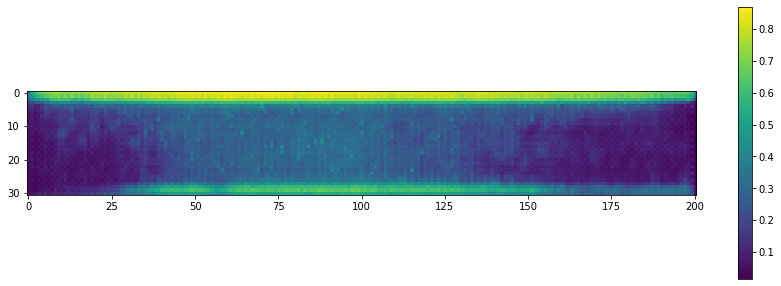

In [35]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
cb = ax.imshow(tf_pred[0, :, :, 0])
fig.colorbar(cb)

/home/munchmej/anaconda3/envs/eqtransformer/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  after removing the cwd from sys.path.


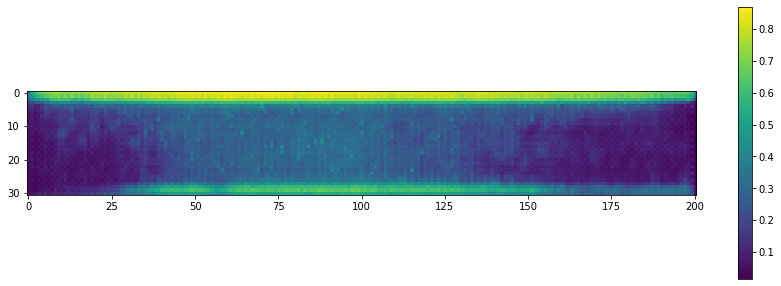

In [36]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111)
ax.imshow(pt_pred[0, :, :, 0])
fig.colorbar(cb)

In [37]:
np.max(np.abs(tf_pred - pt_pred))

1.5497208e-06

# Application to waveforms

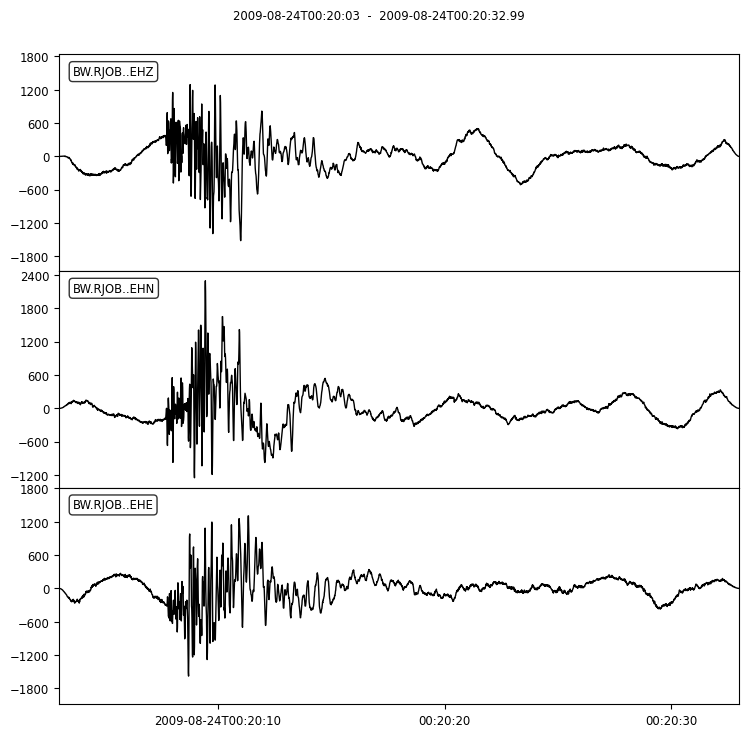

In [38]:
import obspy
stream = obspy.read()
stream.plot();

In [39]:
data = stream[0].data.copy()

In [40]:
import scipy.signal
from scipy.interpolate import interp1d

In [41]:
def normalize_batch(data, window=200):
    """
    data: nbn, nf, nt, 2
    """
    assert len(data.shape) == 4
    shift = window // 2
    nbt, nf, nt, nimg = data.shape

    ## std in slide windows
    data_pad = np.pad(data, ((0, 0), (0, 0), (window // 2, window // 2), (0, 0)), mode="reflect")
    t = np.arange(0, nt + shift - 1, shift, dtype="int")  # 201 => 0, 100, 200
    # print(f"nt = {nt}, nt+window//2 = {nt+window//2}")
    std = np.zeros([nbt, len(t)])
    mean = np.zeros([nbt, len(t)])
    for i in range(std.shape[1]):
        std[:, i] = np.std(data_pad[:, :, i * shift : i * shift + window, :], axis=(1, 2, 3))
        mean[:, i] = np.mean(data_pad[:, :, i * shift : i * shift + window, :], axis=(1, 2, 3))

    std[:, -1], mean[:, -1] = std[:, -2], mean[:, -2]
    std[:, 0], mean[:, 0] = std[:, 1], mean[:, 1]

    ## normalize data with interplated std
    t_interp = np.arange(nt, dtype="int")
    std_interp = interp1d(t, std, kind="slinear")(t_interp)
    std_interp[std_interp == 0] = 1.0
    mean_interp = interp1d(t, mean, kind="slinear")(t_interp)

    data = (data - mean_interp[:, np.newaxis, :, np.newaxis]) / std_interp[:, np.newaxis, :, np.newaxis]

    if len(t) > 3:  ##need to address this normalization issue in training
        data /= 2.0

    return data

In [42]:
FS = 100
NPERSEG = 30
NFFT = 60

# vec = data - np.mean(data)
vec = data.copy()

f, t, tmp_signal = scipy.signal.stft(vec, fs=FS, nperseg=NPERSEG, nfft=NFFT, boundary='zeros')
noisy_signal = np.stack([tmp_signal.real, tmp_signal.imag], axis=0)

noisy_signal[np.isnan(noisy_signal)] = 0
noisy_signal[np.isinf(noisy_signal)] = 0

noisy_signal = np.expand_dims(noisy_signal, 0)  # Add batch dim

In [43]:
X_input = normalize_batch(noisy_signal.transpose(0, 2, 3, 1)).transpose(0, 3, 1, 2)

In [44]:
X_input.shape

(1, 2, 31, 201)

In [45]:
noisy_signal.shape

(1, 2, 31, 201)

In [46]:
X_input = torch.tensor(X_input, dtype=torch.float32)

In [47]:
with torch.no_grad():
    preds = model(X_input).numpy()
preds = preds[0]

In [48]:
_, denoised_signal = scipy.signal.istft(
    (noisy_signal[0, 0] + noisy_signal[0, 1] * 1j) * preds[0],
    fs=FS,
    nperseg=NPERSEG,
    nfft=NFFT,
    boundary='zeros',
)

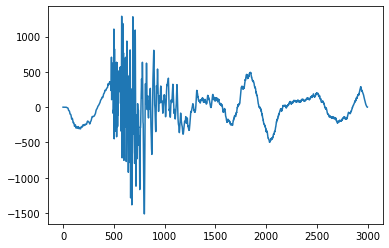

In [49]:
plt.plot(denoised_signal)

In [50]:
import requests
DEEPDENOISER_API_URL = "http://deepdenoiser.quakeflow.com"

In [51]:
req = {"id": ['BW.RJOB..EH'],
       "timestamp": ['2009-08-24T00:20:03.000'],
       "vec": [vec.reshape(-1, 1).tolist()]}

In [52]:
resp = requests.post(f'{DEEPDENOISER_API_URL}/predict', json=req)
print(resp)

<Response [200]>


In [53]:
denoised_data = np.array(resp.json()["vec"])

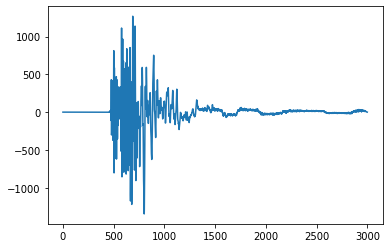

In [54]:
plt.plot(denoised_data[0, :, 0])

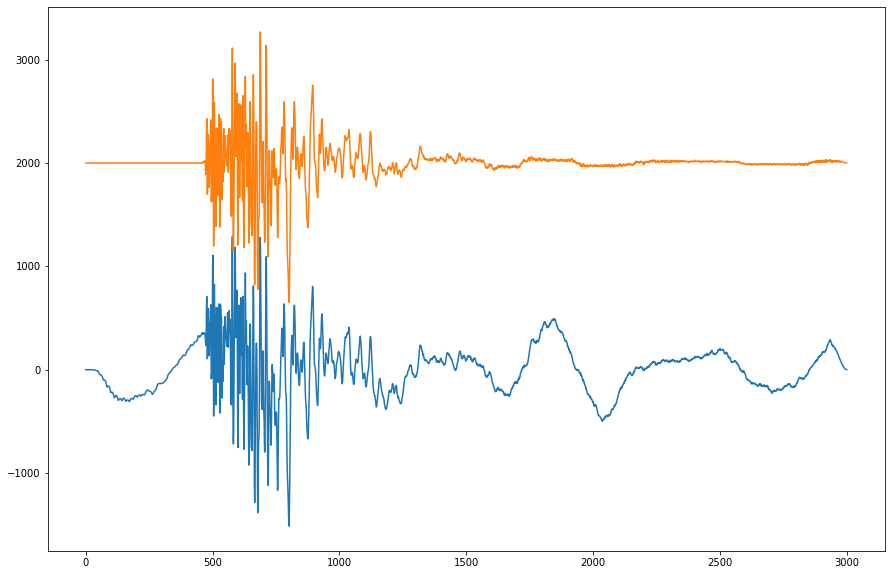

In [55]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(111)
ax.plot(denoised_signal)
ax.plot(denoised_data[0, :, 0] + 2000)

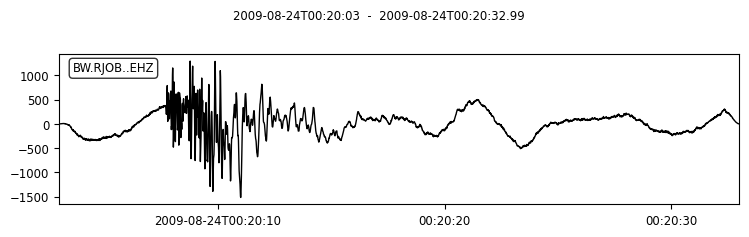

In [60]:
stream[:1].plot();

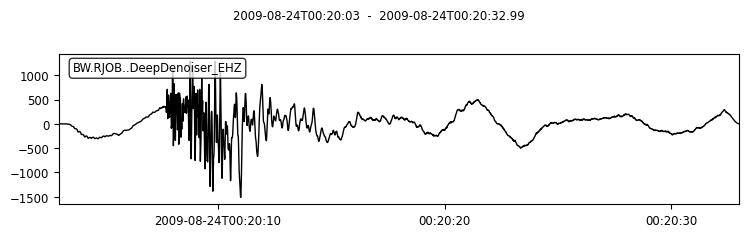

In [61]:
model.annotate(stream[:1]).plot();

## Load pretrained version

In [15]:
from seisbench.models import DeepDenoiser

model = DeepDenoiser.from_pretrained("urban")
# model = DeepDenoiser.from_pretrained("original")
print(model.weights_docstring)

UrbanDenoiser model by Yang et al. (2022). Originally published under CC0 1.0. Original available at https://doi.org/10.7910/DVN/YTMYO9 .

Converted to SeisBench by Jannes Münchmeyer (munchmej@gfz-potsdam.de)


In [7]:
from obspy.clients.fdsn import Client
from obspy import UTCDateTime

In [8]:
client = Client("IRIS")

In [9]:
t0 = UTCDateTime("2014-05-13")
stream = client.get_waveforms(network="ZG", station="R0101", location="*", channel="*", starttime=t0, endtime=t0+300)
stream

1 Trace(s) in Stream:
ZG.R0101..DPZ | 2014-05-13T00:00:00.000000Z - 2014-05-13T00:05:00.000000Z | 500.0 Hz, 150001 samples

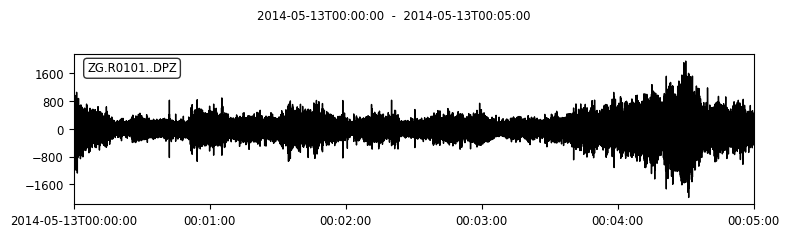

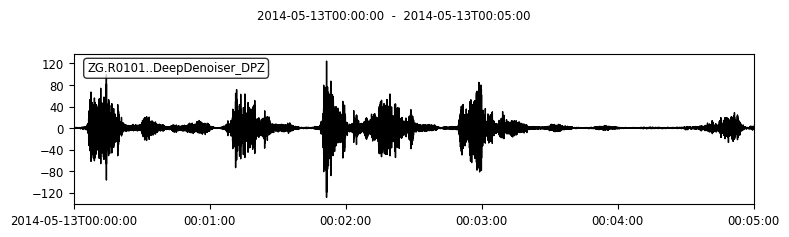

In [16]:
stream.plot();
model.annotate(stream).plot();